### Imports básicos


In [52]:
from copy import deepcopy
import pandas as pd
import numpy as np


### Setando nome das colunas baseados em latitude e longitude


In [53]:
w_values = range(60,0,-2)

In [54]:
len(w_values)

30

In [55]:
e_values = range(0,15,2)

In [56]:
len(e_values)

8

In [57]:
n_values = range(30,0,-2)

In [58]:
len(n_values)

15

In [59]:
s_values = range(0,20,2)

In [60]:
len(s_values)

10

In [61]:
colunas = []
linhas = []

# LINHA
for value in w_values:
    column_name = str(value) + "W"
    linhas.append(column_name)
    
for value in e_values:
    column_name = str(value) + "E"
    linhas.append(column_name)

# COLUNA    
for value in n_values:
    column_name = str(value) + "N"
    colunas.append(column_name)
    
for value in s_values:
    column_name = str(value) + "S"
    colunas.append(column_name)

len(colunas)

25

In [62]:
colunas_do_data_frame = []
for linha in linhas:
    for coluna in colunas:
        lat_long = linha + "-" + coluna
        colunas_do_data_frame.append(lat_long)
        

In [63]:
len(colunas_do_data_frame)

950

In [64]:
file_name = "_Dados_TSMvento_2014_04_anomt6414b04"
file_content = open(file_name).read()
file_header = file_content[0:50]
print("Header", file_header)
file_content = file_content.replace("\n", "")

Header     4    4    5    5    5    5    4    2    0    0


In [65]:
# Todo mês possui 25 linhas por 38 colunas que dá 950
BLOCO_DE_DADOS_POR_MES = 950
BLOCO_TOTAL = 573800 #(950 blocos x 604 meses)

In [66]:
# Carrega todos os dados de anomalia em um único array
block_size = 5
full_data = []
for rows_index in range(BLOCO_TOTAL):
    # slice data like (n:n+5)
    value = float(file_content[rows_index * block_size: rows_index * block_size + block_size])
    full_data.append(value)

In [67]:
len(full_data)

573800

Para fins de debug

In [68]:
count = 0
for i in range(0, BLOCO_TOTAL, 950):
    print (i, "linha final",(count+1)*75)
    count += 1

0 linha final 75
950 linha final 150
1900 linha final 225
2850 linha final 300
3800 linha final 375
4750 linha final 450
5700 linha final 525
6650 linha final 600
7600 linha final 675
8550 linha final 750
9500 linha final 825
10450 linha final 900
11400 linha final 975
12350 linha final 1050
13300 linha final 1125
14250 linha final 1200
15200 linha final 1275
16150 linha final 1350
17100 linha final 1425
18050 linha final 1500
19000 linha final 1575
19950 linha final 1650
20900 linha final 1725
21850 linha final 1800
22800 linha final 1875
23750 linha final 1950
24700 linha final 2025
25650 linha final 2100
26600 linha final 2175
27550 linha final 2250
28500 linha final 2325
29450 linha final 2400
30400 linha final 2475
31350 linha final 2550
32300 linha final 2625
33250 linha final 2700
34200 linha final 2775
35150 linha final 2850
36100 linha final 2925
37050 linha final 3000
38000 linha final 3075
38950 linha final 3150
39900 linha final 3225
40850 linha final 3300
41800 linha final

In [69]:
# for i in range(570000, 570000 +BLOCO_DE_DADOS_POR_MES):
#     print( i,full_data[i])

In [70]:
meses = []
for i in range(0, BLOCO_TOTAL, 950):
    print(i, i+BLOCO_DE_DADOS_POR_MES)
    mes = full_data[i:i+BLOCO_DE_DADOS_POR_MES]
    meses.append(mes)
print(len(meses))


0 950
950 1900
1900 2850
2850 3800
3800 4750
4750 5700
5700 6650
6650 7600
7600 8550
8550 9500
9500 10450
10450 11400
11400 12350
12350 13300
13300 14250
14250 15200
15200 16150
16150 17100
17100 18050
18050 19000
19000 19950
19950 20900
20900 21850
21850 22800
22800 23750
23750 24700
24700 25650
25650 26600
26600 27550
27550 28500
28500 29450
29450 30400
30400 31350
31350 32300
32300 33250
33250 34200
34200 35150
35150 36100
36100 37050
37050 38000
38000 38950
38950 39900
39900 40850
40850 41800
41800 42750
42750 43700
43700 44650
44650 45600
45600 46550
46550 47500
47500 48450
48450 49400
49400 50350
50350 51300
51300 52250
52250 53200
53200 54150
54150 55100
55100 56050
56050 57000
57000 57950
57950 58900
58900 59850
59850 60800
60800 61750
61750 62700
62700 63650
63650 64600
64600 65550
65550 66500
66500 67450
67450 68400
68400 69350
69350 70300
70300 71250
71250 72200
72200 73150
73150 74100
74100 75050
75050 76000
76000 76950
76950 77900
77900 78850
78850 79800
79800 80750
80750 

# Criando Pandas a partir dos dados de anomalida da FUNCEME

In [71]:
funceme_df = pd.DataFrame()

In [72]:
columns = range(0,950)
for mes in meses:
    data = np.array(mes)
    row_df = pd.DataFrame(data.reshape(-1, len(data)), columns=colunas_do_data_frame)
    funceme_df = funceme_df.append(row_df)

In [73]:
funceme_df.index = range(0, 604, 1)
funceme_df.shape


(604, 950)

In [74]:
funceme_df.head()

,60W-30N,60W-28N,60W-26N,60W-24N,60W-22N,60W-20N,60W-18N,60W-16N,60W-14N,60W-12N,...,14E-0S,14E-2S,14E-4S,14E-6S,14E-8S,14E-10S,14E-12S,14E-14S,14E-16S,14E-18S
0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,0.0,0.0,...,4.0,7.0,9.0,11.0,8.0,9.0,11.0,13.0,18.0,99998.0
1,2.0,0.0,0.0,-2.0,-2.0,-2.0,1.0,3.0,4.0,7.0,...,-2.0,-1.0,0.0,-2.0,-3.0,-2.0,-1.0,0.0,2.0,99998.0
2,-1.0,1.0,2.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,...,-5.0,-6.0,-6.0,-5.0,-4.0,-2.0,0.0,1.0,3.0,99998.0
3,8.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,-4.0,-7.0,-8.0,-8.0,-1.0,4.0,10.0,15.0,99998.0
4,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,4.0,...,2.0,1.0,-1.0,-6.0,-10.0,-13.0,-17.0,-20.0,-22.0,99998.0


### Setando indices baseados na data


In [75]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

FORMAT = "%Y-%m"
some_date_time1 = "1964-01"
data_inicial = datetime.strptime(some_date_time1, FORMAT)
data_depois = data_inicial + relativedelta(months=1)

In [76]:
indexes_data = []
for i in range(len(meses)):
    indexes_data.append(data_inicial + relativedelta(months=i))

In [77]:
funceme_df=funceme_df.set_index(pd.DatetimeIndex(data=indexes_data))

In [78]:
funceme_df.head()

,60W-30N,60W-28N,60W-26N,60W-24N,60W-22N,60W-20N,60W-18N,60W-16N,60W-14N,60W-12N,...,14E-0S,14E-2S,14E-4S,14E-6S,14E-8S,14E-10S,14E-12S,14E-14S,14E-16S,14E-18S
1964-01-01,4.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,0.0,0.0,...,4.0,7.0,9.0,11.0,8.0,9.0,11.0,13.0,18.0,99998.0
1964-02-01,2.0,0.0,0.0,-2.0,-2.0,-2.0,1.0,3.0,4.0,7.0,...,-2.0,-1.0,0.0,-2.0,-3.0,-2.0,-1.0,0.0,2.0,99998.0
1964-03-01,-1.0,1.0,2.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,...,-5.0,-6.0,-6.0,-5.0,-4.0,-2.0,0.0,1.0,3.0,99998.0
1964-04-01,8.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,-4.0,-7.0,-8.0,-8.0,-1.0,4.0,10.0,15.0,99998.0
1964-05-01,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,5.0,4.0,...,2.0,1.0,-1.0,-6.0,-10.0,-13.0,-17.0,-20.0,-22.0,99998.0


# Decomposição temporal da série


### Adicional imports


In [79]:
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
%matplotlib inline
from matplotlib import pyplot as plt

### Filtro de data

In [80]:
funceme_df = funceme_df.loc['2009-01-01':'2014-12-01']

# Função que decompões função baseado na lat, long

In [116]:
def monta_grafico_de_decomposicao(coluna):
    decompose_model = seasonal.seasonal_decompose(funceme_df[coluna].tolist(), freq=12,
                                          model='additive')
    fig, axarr = plt.subplots(4, sharex=True)
    fig.set_size_inches(5.5, 5.5)

    funceme_df[coluna].plot(ax=axarr[0], color='b', linestyle='-')
    axarr[0].set_title('Gráfico mensal')

    pd.Series(data=decompose_model.trend, index=funceme_df.index).plot(color='r', linestyle='-', ax=axarr[1])
    axarr[1].set_title('Gráfico de Tendência')

    pd.Series(data=decompose_model.seasonal, index=funceme_df.index).plot(color='g', linestyle='-', ax=axarr[2])
    axarr[2].set_title('Componente Seasonal')

    pd.Series(data=decompose_model.resid, index=funceme_df.index).plot(color='k', linestyle='-', ax=axarr[3])
    axarr[3].set_title('Variações irregulares')

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    plt.xticks(rotation=10)


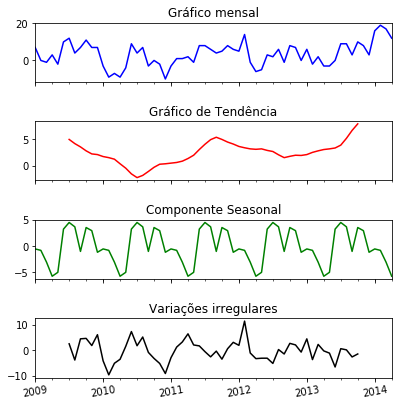

In [117]:
monta_grafico_de_decomposicao('60W-30N')

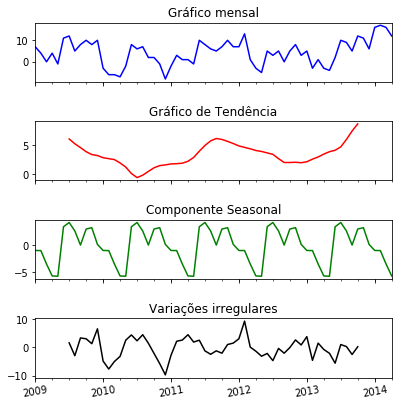

In [118]:
monta_grafico_de_decomposicao('60W-28N')

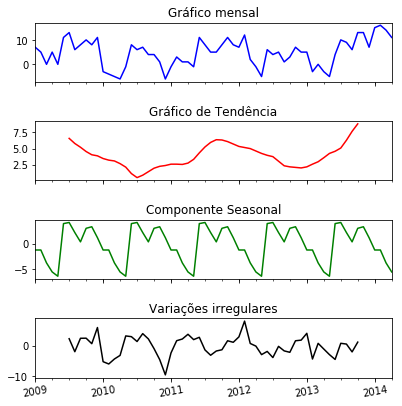

In [119]:
monta_grafico_de_decomposicao('60W-26N')

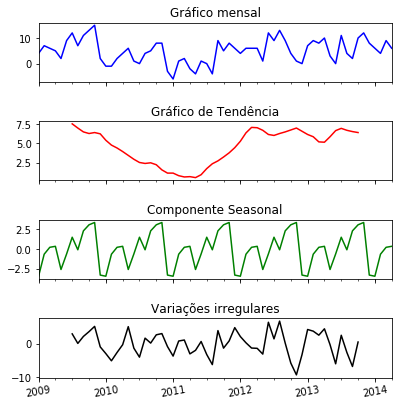

In [120]:
monta_grafico_de_decomposicao('60W-10N')